<hr/>

# Foundations of Reinforcement Learning

<hr/>

<h1><font color="darkblue">Lab bonus: More on multi-armed Bandit </font></h1>



<img src="multiarmedbandit.jpg" width="300" height="300" align="left"/>


<br><br><br><br><br><br><br><br><br><br><br><br>


[image source](https://www.microsoft.com/en-us/research/?from=http%3A%2F%2Fresearch.microsoft.com%2Fen-us%2Fprojects%2Fbandits%2F)



##  Content
1. Problem statement
0. Gradient Bandit Algorithm

# plot your results
Margarita Prikhodko

In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Problem Statement [P 21, Ch 2.3, Sutton]

#### Define a 10-armed bandit problem in which the action values $q_*(a)$, $a = 1,...,10$, are samples from a standard norm distribution, i.e. Gaussian distribution with mean $= 0$ and variance $ = 1$. Then, when selected $A_t$ at time step $t$, the actual reward, $R_t$ is selected from a Gaussian distribution with mean = $q_*(A_t)$ and variance = 1.

In [3]:
# write any global function here if needed

## Problem 1.  Gradient Bandit Algorithm

1. Change with mean of $q_*(a)$ to 4. And implement a function/functions that run this game 2000 times with Gradient Bandit algorithm. Your function/functions should include $\alpha$ and an indicator of whether you have a baseline. Then output: (7 pts)
<br>   - percentage of optimal action at each time step
2. Call your function/functions to generate the percentage of optimal action at each time step with: (1 pts)
<br>   -  Gradient Bandit algorithm, $\alpha = 0.1$ with baseline
<br>   -  Gradient Bandit algorithm, $\alpha = 0.1$ without baseline (i.e. $\bar{R_t}	\equiv 0$)
3. Plot the percentage of optimal action of those two cases, then compare with [P 29 Fig 2.5 Sutton]. (2 pts)

### 1.

In [4]:
def softmax(action_preferences, tau=1.0):
    """Softmax policy for action selection."""
    exp_preferences = np.exp(action_preferences / tau)
    action_probs = exp_preferences / np.sum(exp_preferences)
    return action_probs

In [5]:
import numpy as np

arm_num = 10
time_step_num = 1000
game_num = 2000
alpha = 0.1
# True action values q*(a) for each arm, sampled from standard normal distribution
sigma=1
mu=4
true_action_values = sigma*np.random.randn(arm_num) +mu
def multi_armed_Gradient(arm_num, time_step_num, game_num, alpha, flag):
    ave_reward = np.zeros(time_step_num)
    ave_opt_action = np.zeros(time_step_num)
    
    for _ in range(game_num):
        # Initialize action preferences
        action_preferences = np.zeros(arm_num)
        optimal_action_count = 0
        rewards = []

        for step in range(time_step_num):
            action_probs = softmax(action_preferences)
            action_chosen = np.random.choice(arm_num, p=action_probs)

            if action_chosen == np.argmax(true_action_values):
                optimal_action_count += 1

            reward = np.random.randn() + true_action_values[action_chosen]
            rewards.append(reward)

            # Update preferences
            for a in range(arm_num):
                if a == action_chosen:
                    action_preferences[a] += alpha * (reward - flag * action_preferences[a]) * (1 - action_probs[a])
                else:
                    action_preferences[a] -= alpha * (reward - flag * action_preferences[a]) * action_probs[a]

            ave_reward[step] += reward

        ave_opt_action += (optimal_action_count / time_step_num) * 100

    ave_reward /= game_num
    ave_opt_action /= game_num

    return ave_reward, ave_opt_action

    

In [6]:
arm_num = 10
time_step_num = 1000
game_num = 2000
alpha = 0.1

ave_reward_with_baseline, ave_opt_action_with_baseline = multi_armed_Gradient(arm_num, time_step_num, game_num, alpha, 1)

# Without baseline
ave_reward_without_baseline, ave_opt_action_without_baseline = multi_armed_Gradient(arm_num, time_step_num, game_num, alpha, 0)


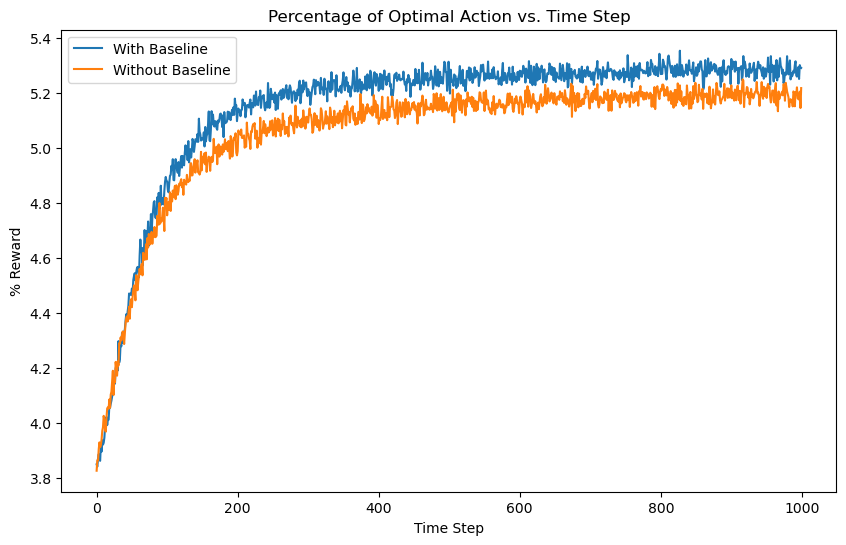

In [7]:

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(ave_reward_with_baseline, label='With Baseline')
plt.plot(ave_reward_without_baseline, label='Without Baseline')
plt.xlabel('Time Step')
plt.ylabel('% Reward')
plt.legend()
plt.title('Percentage of Optimal Action vs. Time Step')
plt.show()


### 2.

### 3.

In [8]:
# plot your results